局部二值模式

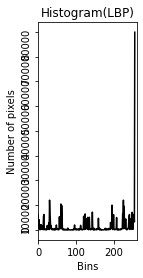

LBP Program is finished


In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

def get_pixel(img, center, x, y):
    new_value = 0
    try:
        if img[x][y] >= center:
            new_value = 1
    except:
        pass
    return new_value

def lbp_calculated_pixel(img, x, y):
    '''

     64 | 128 |   1
    ----------------
     32 |   0 |   2
    ----------------
     16 |   8 |   4    

    '''    
    center = img[x][y]
    val_ar = []
    val_ar.append(get_pixel(img, center, x-1, y+1))     # top_right
    val_ar.append(get_pixel(img, center, x, y+1))       # right
    val_ar.append(get_pixel(img, center, x+1, y+1))     # bottom_right
    val_ar.append(get_pixel(img, center, x+1, y))       # bottom
    val_ar.append(get_pixel(img, center, x+1, y-1))     # bottom_left
    val_ar.append(get_pixel(img, center, x, y-1))       # left
    val_ar.append(get_pixel(img, center, x-1, y-1))     # top_left
    val_ar.append(get_pixel(img, center, x-1, y))       # top
    
    power_val = [1, 2, 4, 8, 16, 32, 64, 128]
    val = 0
    for i in range(len(val_ar)):
        val += val_ar[i] * power_val[i]
    return val    

def show_output(output_list):
    output_list_len = len(output_list)
    figure = plt.figure()
    for i in range(output_list_len):
        current_dict = output_list[i]
        current_img = current_dict["img"]

        # cv2_imshow(current_dict["img"])
        current_xlabel = current_dict["xlabel"]
        current_ylabel = current_dict["ylabel"]
        current_xtick = current_dict["xtick"]
        current_ytick = current_dict["ytick"]
        current_title = current_dict["title"]
        current_type = current_dict["type"]
        # current_plot = figure.add_subplot(1, output_list_len, i+1)
        if current_type == "gray":
            # current_plot.imshow(current_img, cmap = plt.get_cmap('gray'))
            # current_plot.set_title(current_title)
            # current_plot.set_xticks(current_xtick)
            # current_plot.set_yticks(current_ytick)
            # current_plot.set_xlabel(current_xlabel)
            # current_plot.set_ylabel(current_ylabel)
            print()
        elif current_type == "histogram":
            current_plot = figure.add_subplot(1, output_list_len, i+1)
            current_plot.plot(current_img, color = "black")
            current_plot.set_xlim([0,260])
            current_plot.set_title(current_title)
            current_plot.set_xlabel(current_xlabel)
            current_plot.set_ylabel(current_ylabel)            
            ytick_list = [int(i) for i in current_plot.get_yticks()]
            current_plot.set_yticklabels(ytick_list,rotation = 90)

    plt.show()
    
def main():
    image_file = 'test.png'
    img_bgr = cv2.imread(image_file)
    height, width, channel = img_bgr.shape
    img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
    
    img_lbp = np.zeros((height, width,3), np.uint8)
    for i in range(0, height):
        for j in range(0, width):
             img_lbp[i, j] = lbp_calculated_pixel(img_gray, i, j)
    hist_lbp = cv2.calcHist([img_lbp], [0], None, [256], [0, 256])
    output_list = []
    output_list.append({
        "img": img_gray,
        "xlabel": "",
        "ylabel": "",
        "xtick": [],
        "ytick": [],
        "title": "Gray Image",
        "type": "gray"        
    })
    output_list.append({
        "img": img_lbp,
        "xlabel": "",
        "ylabel": "",
        "xtick": [],
        "ytick": [],
        "title": "LBP Image",
        "type": "gray"
    })    
    output_list.append({
        "img": hist_lbp,
        "xlabel": "Bins",
        "ylabel": "Number of pixels",
        "xtick": None,
        "ytick": None,
        "title": "Histogram(LBP)",
        "type": "histogram"
    })

    show_output(output_list)
                             
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    print("LBP Program is finished")

if __name__ == '__main__':
    main()

In [ ]:
#Local Binary Pattern
def LocalBinaryPattern(path):
  def get_pixel(img, center, x, y):
      
    new_value = 0
      
    try:
        # If local neighbourhood pixel 
        # value is greater than or equal
        # to center pixel values then 
        # set it to 1
        if img[x][y] >= center:
            new_value = 1
              
    except:
        # Exception is required when 
        # neighbourhood value of a center
        # pixel value is null i.e. values
        # present at boundaries.
        pass
      
    return new_value
  def lbp_calculated_pixel(img, x, y):
   
    center = img[x][y]
   
    val_ar = []
      
    # top_left
    val_ar.append(get_pixel(img, center, x-1, y-1))
      
    # top
    val_ar.append(get_pixel(img, center, x-1, y))
      
    # top_right
    val_ar.append(get_pixel(img, center, x-1, y + 1))
      
    # right
    val_ar.append(get_pixel(img, center, x, y + 1))
      
    # bottom_right
    val_ar.append(get_pixel(img, center, x + 1, y + 1))
      
    # bottom
    val_ar.append(get_pixel(img, center, x + 1, y))
      
    # bottom_left
    val_ar.append(get_pixel(img, center, x + 1, y-1))
      
    # left
    val_ar.append(get_pixel(img, center, x, y-1))
       
    # Now, we need to convert binary
    # values to decimal
    power_val = [1, 2, 4, 8, 16, 32, 64, 128]
   
    val = 0
      
    for i in range(len(val_ar)):
        val += val_ar[i] * power_val[i]
          
    return val
  img_bgr = cv2.imread(path, 1)
   
  height, width, _ = img_bgr.shape
    
  # We need to convert RGB image 
  # into gray one because gray 
  # image has one channel only.
  img_gray = cv2.cvtColor(img_bgr,
                          cv2.COLOR_BGR2GRAY)
    
  # Create a numpy array as 
  # the same height and width 
  # of RGB image
  img_lbp = np.zeros((height, width),
                    np.uint8)
    
  for i in range(0, height):
      for j in range(0, width):
          img_lbp[i, j] = lbp_calculated_pixel(img_gray, i, j)
    
  plt.imshow(img_bgr)
  plt.show()
    
  plt.imshow(img_lbp, cmap ="gray")
  plt.show()
    
  print("LBP Program is finished")
  # 參考https://github.com/arsho/local_binary_patterns/blob/master/lbp.py


GLCM

In [ ]:
def glcm(src):
  gray_level = 32
  def maxGrayLevel(img):
    max_gray_level = 0
    (height,width) = img.shape
    for y in range(height):
      for x in range(width):
        if img[y][x] > max_gray_level:
          max_gray_level = img[y][x]
    return max_gray_level+1

  def getGlcm(img,d_x,d_y):
    srcdata = img.copy()
    ret = [[0.0 for i in range(gray_level)] for j in range(gray_level)]
    (height,width) = img.shape

    max_gray_level = maxGrayLevel(img)

    if max_gray_level > gray_level:
      for j in range(height):
        for i in range(width):
          srcdata[j][i] = srcdata[j][i]*gray_level / max_gray_level
    for j in range(height - d_y):
      for i in range(width - d_x):
        rows = srcdata[j][i]
        cols = srcdata[j + d_y][i + d_x]
        ret[rows][cols] += 1.0
    for i in range(gray_level):
      for j in range(gray_level):
        ret[i][j] /= float(height * width)
    return ret
  
  def feature_computer(p):
    con = 0.0
    eng = 0.0
    asm = 0.0
    idm = 0.0
    for i in range(gray_level):
      for j in range(gray_level):
        con += (i-j) * (i-j) * p[i][j]
        asm += p[i][j] * p[i][j]
        idm += p[i][j] / (1 + (i-j) * (i-j))
        if p[i][j] > 0.0:
          eng += p[i][j] * math.log(p[i][j])
    return asm,con,eng,idm
  
  img = cv2.imread(src, 1)
  img_shape = img.shape
  img = cv2.resize(img,(int(img_shape[1] / 2), int(img_shape[0] / 2)),interpolation = cv2.INTER_CUBIC)
  img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  glcm_0 = getGlcm(img_gray,1,0)
  asm,con,eng,idm = feature_computer(glcm_0)  # asm=角二階矩,con=對比度,eng=熵,idm=反差方矩陣
  print(asm,con,eng,idm)

In [ ]:
def hestmap(data):
  import seaborn as sns
  %matplotlib inline
  sns.set(font_scale=1)
  sns.set_context({"figure.figsize":(12,12)})
  sns.heatmap(data=data,annot=True,fmt=".1f",cmap="binary")

In [ ]:
import cv2
import math

#定义最大灰度级数
gray_level = 16

def maxGrayLevel(img):
    max_gray_level=0
    (height,width)=img.shape
    # print(height,width)
    for y in range(height):
        for x in range(width):
            if img[y][x] > max_gray_level:
                max_gray_level = img[y][x]
    return max_gray_level+1

def getGlcm(input,d_x,d_y):
    srcdata=input.copy()
    ret=[[0.0 for i in range(gray_level)] for j in range(gray_level)]
    (height,width) = input.shape
    
    max_gray_level=maxGrayLevel(input)
    print("max_gray_level="+str(max_gray_level))
    #若灰度级数大于gray_level，则将图像的灰度级缩小至gray_level，减小灰度共生矩阵的大小
    if max_gray_level > gray_level:
        for j in range(height):
            for i in range(width):
                srcdata[j][i] = srcdata[j][i]*gray_level / max_gray_level

    for j in range(height-d_y):
        for i in range(width-d_x):
             rows = srcdata[j][i]
             cols = srcdata[j + d_y][i+d_x]
             ret[rows][cols]+=1.0

    for i in range(gray_level):
        for j in range(gray_level):
            ret[i][j]/=float(height*width)

    return ret

def feature_computer(p):
    Con=0.0
    Eng=0.0
    Asm=0.0
    Idm=0.0
    for i in range(gray_level):
        for j in range(gray_level):
            Con+=(i-j)*(i-j)*p[i][j]
            Asm+=p[i][j]*p[i][j]
            Idm+=p[i][j]/(1+(i-j)*(i-j))
            if p[i][j]>0.0:
                Eng+=p[i][j]*math.log(p[i][j])
    return Asm,Con,-Eng,Idm

def test(image_name):
    img = cv2.imread(image_name)
    try:
        img_shape=img.shape
    except:
        print('imread error')
        return

    img=cv2.resize(img,(img_shape[1]//2,img_shape[0]//2),interpolation=cv2.INTER_CUBIC)

    img_gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    glcm_0=getGlcm(img_gray, 1,0)
    #glcm_1=getGlcm(src_gray, 0,1)
    #glcm_2=getGlcm(src_gray, 1,1)
    #glcm_3=getGlcm(src_gray, -1,1)
    
    hestmap(glcm_0)
    
    asm,con,eng,idm=feature_computer(glcm_0)

    return [asm,con,eng,idm]

if __name__=='__main__':
    result = test("test.png")
    print("contrast="+str(result[1]))
    print("Entropy="+str(result[2]))
    # print(result)

max_gray_level=256
contrast=0.9181790123456792
Entropy=2.704669027671504
